# Thermal Comfort Prediction Model

ASHRAE Global Thermal Comfort Database II given by https://datadryad.org/stash/dataset/doi:10.6078/D1F671

# Data Preprocessing

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_excel("C:\\Users\\Mohammed Shreef\\Desktop\\HiWi\\ashrae_data.xlsx")

In [3]:
NT=pd.DataFrame(df.isnull().sum())

In [4]:
NT.head(35)

,0
Publication (Citation),1655
Data contributor,0
Year,248
Season,241
Koppen climate classification,0
Climate,0
City,13
Country,0
Building type,4199
Cooling startegy_building level,1227


In [5]:
df.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference',
       'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10',
       'activity_20', 'activity_30', 'activity_60', 'Air temperature (¡C)',
       'Air temperature (¡F)', 'Ta_h (¡C)', 'Ta_h (¡F)', 'Ta_m (¡C)',
       'Ta_m (¡F)', 'Ta_l (¡C)', 'Ta_l (¡F)', 'Operative temperature (¡C)',
       'Operative temperature (¡F)', 'Radiant temperature (¡C)',
       'Radiant temperature (¡F)', 'Globe temperature (¡C)',
       'Globe temperature (¡F)', 'Tg_h (¡C)', 'Tg_h (¡F)', 'Tg_m (¡C)',
       'Tg_m (¡F)', 'Tg_l (¡C)', 'Tg_l (

In [6]:
#Choosinh only columns(Features) that has more influence on predicting Thermal comfort
train_data= ['Clo','Met','Air temperature (¡C)','Radiant temperature (¡C)','Relative humidity (%)','Air velocity (m/s)','Thermal sensation', 'PMV']

In [7]:
clean_data=df[train_data]

In [8]:
clean_data.corr()

,Clo,Met,Air temperature (¡C),Radiant temperature (¡C),Relative humidity (%),Air velocity (m/s),Thermal sensation,PMV
Clo,1.000000,0.021563,-0.465531,-0.496026,-0.256446,-0.109063,-0.184438,-0.005482
Met,0.021563,1.000000,-0.082616,0.007953,-0.099590,-0.007087,0.060355,0.243532
Air temperature (¡C),-0.465531,-0.082616,1.000000,0.919198,0.115516,0.224138,0.379257,0.781023
Radiant temperature (¡C),-0.496026,0.007953,0.919198,1.000000,0.056033,0.133177,0.441187,0.761725
Relative humidity (%),-0.256446,-0.099590,0.115516,0.056033,1.000000,0.087463,-0.018958,0.077893
Air velocity (m/s),-0.109063,-0.007087,0.224138,0.133177,0.087463,1.000000,0.040815,0.058359
Thermal sensation,-0.184438,0.060355,0.379257,0.441187,-0.018958,0.040815,1.000000,0.332810
PMV,-0.005482,0.243532,0.781023,0.761725,0.077893,0.058359,0.332810,1.000000


In [9]:
clean_data.shape

(107583, 8)

In [10]:
clean_data.dtypes

Clo                         float64
Met                         float64
Air temperature (¡C)        float64
Radiant temperature (¡C)    float64
Relative humidity (%)       float64
Air velocity (m/s)          float64
Thermal sensation           float64
PMV                         float64
dtype: object

In [11]:
clean_data.isnull().sum()

Clo                          7920
Met                         17164
Air temperature (¡C)         7672
Radiant temperature (¡C)    75110
Relative humidity (%)        9821
Air velocity (m/s)          17691
Thermal sensation            3129
PMV                         40849
dtype: int64

In [12]:
clean_data.head()

,Clo,Met,Air temperature (¡C),Radiant temperature (¡C),Relative humidity (%),Air velocity (m/s),Thermal sensation,PMV
0,0.25,NaN,24.2,NaN,50.2,0.06,-0.5,NaN
1,0.25,NaN,24.2,NaN,50.2,0.06,-2.1,NaN
2,0.27,NaN,24.2,NaN,50.2,0.06,0.5,NaN
3,0.23,NaN,24.2,NaN,50.2,0.06,-2.5,NaN
4,0.34,NaN,24.2,NaN,50.2,0.06,-0.5,NaN


In [13]:
clean_data.dropna(inplace=True)

<ipython-input-13-355eb8397086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.dropna(inplace=True)


In [14]:
clean_data.shape

(30651, 8)

In [15]:
clean_data['PMV']=clean_data['PMV'].astype('int64')

<ipython-input-15-4618c159d15b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['PMV']=clean_data['PMV'].astype('int64')


In [16]:
clean_data['Thermal sensation']=clean_data['Thermal sensation'].astype('int64')

<ipython-input-16-83a467edc848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Thermal sensation']=clean_data['Thermal sensation'].astype('int64')


# PMV(Predicted mean vote) model

In [17]:
x=clean_data.iloc[:,0:6]

In [18]:
y_pmv=clean_data.iloc[:,-1]
y_pmv.head()

15677    1
15678    1
15679    1
15680    0
15681    0
Name: PMV, dtype: int64

In [19]:
x.head()

,Clo,Met,Air temperature (¡C),Radiant temperature (¡C),Relative humidity (%),Air velocity (m/s)
15677,0.47,1.6,28.0,28.1,62.7,0.05
15678,0.49,1.6,27.3,29.4,73.3,0.20
15679,0.49,1.6,27.3,29.4,73.3,0.20
15680,0.50,1.6,26.9,28.2,49.0,0.51
15681,0.38,1.6,27.8,28.1,49.5,0.51


In [20]:
y_pmv.unique()

array([ 1,  0, -1, -2, -3,  2,  3], dtype=int64)

In [21]:
y_pmv

15677     1
15678     1
15679     1
15680     0
15681     0
         ..
104034    0
104035    0
104036    0
104037    0
104038    0
Name: PMV, Length: 30651, dtype: int64

In [22]:
#Second model output
y_sensation=clean_data['Thermal sensation']

In [23]:
y_sensation.head()

15677    1
15678    0
15679    0
15680    1
15681    2
Name: Thermal sensation, dtype: int64

In [24]:
print(x.shape)
print(y_pmv.shape)
print(y_sensation.shape)

(30651, 6)
(30651,)
(30651,)


# Simple Model development

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x, y_pmv, test_size=0.2)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(24520, 6)
(24520,)
(6131, 6)


In [28]:
model=svm.SVC(gamma='auto')
model.fit(x_train,y_train)

SVC(gamma='auto')

In [29]:
model.score(x_test,y_test)

0.8422769531887131

In [30]:
yhat=model.predict(x_test)

In [31]:
yhat[:20]

array([-1,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  1,  0], dtype=int64)

# Hyperparameter Tuning using Randomized search CV

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
#     'C':[1,10,20],
#     'kernel':['rbf','linear']
#   },
#           cv=5,
#           return_train_score=False
#           n_iter=2
#         )

# rs.fit(x,y_pmv)
# pd.DataFrame(rs.cv_results)[['Parameter_c','param_kernal','mean_test_score']]

# HyperParameter Tuning for multiple models using Randomized search CV

In [32]:

model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['linear','rbf']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regresson':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
scores=[]
for model_name,param in model_params.items():
    r_search=RandomizedSearchCV(param['model'], param['params'], cv=5, return_train_score=False, n_iter=2)
    r_search.fit(x,y_pmv)
    scores.append({
        'model':model_name,
        'best_score':r_search.best_score_,
        'best_parameters':r_search.best_params_
    })

C:\Users\Mohammed Shreef\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mohammed Shreef\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mohammed Shreef\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mohammed Shreef\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Mohammed Shreef\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear fai

In [34]:
df=pd.DataFrame(scores, columns=['model','best_score','best_parameters'])

In [35]:
df

,model,best_score,best_parameters
0,svm,0.914717,"{'kernel': 'linear', 'C': 1}"
1,random_forest,0.840167,{'n_estimators': 10}
2,logistic_regresson,0.710123,{'C': 5}


SVM model with arguments c=10 and kernel = Linear gives best accuracy

# Model with above best parameters

In [36]:
classifier=svm.SVC(kernel='linear',C=10)
classifier.fit(x_train,y_train)

classifier.score(x_test,y_test)

0.9337791551133583

In [37]:
y_predicted=model.predict(x_test)
y_predicted[0:10]

array([-1,  0,  0,  0,  1,  0,  0, -1,  0,  0], dtype=int64)

# Confusion Matrix

In [38]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

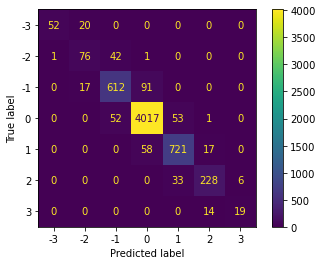

In [39]:
plot_confusion_matrix(classifier,x_test,y_test)
plt.show()

# Converting to pickle file

In [41]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()